In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


Load Data

In [79]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

Train Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of X Train is: ' + str(X_train.shape))
print ('The shape of X Test is: ' + str(X_test.shape))

print ('The shape of y is: ' + str(y.shape))
print ('The shape of y Train is: ' + str(y_train.shape))
print ('The shape of y Test is: ' + str(y_test.shape))

The shape of X is: (5000, 400)
The shape of X Train is: (4000, 400)
The shape of X Test is: (1000, 400)
The shape of y is: (5000, 1)
The shape of y Train is: (4000, 1)
The shape of y Test is: (1000, 1)


View Random Images from the dataset and their labels

<ipython-input-94-3c9c11c7f393>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(int(y[random_index]))


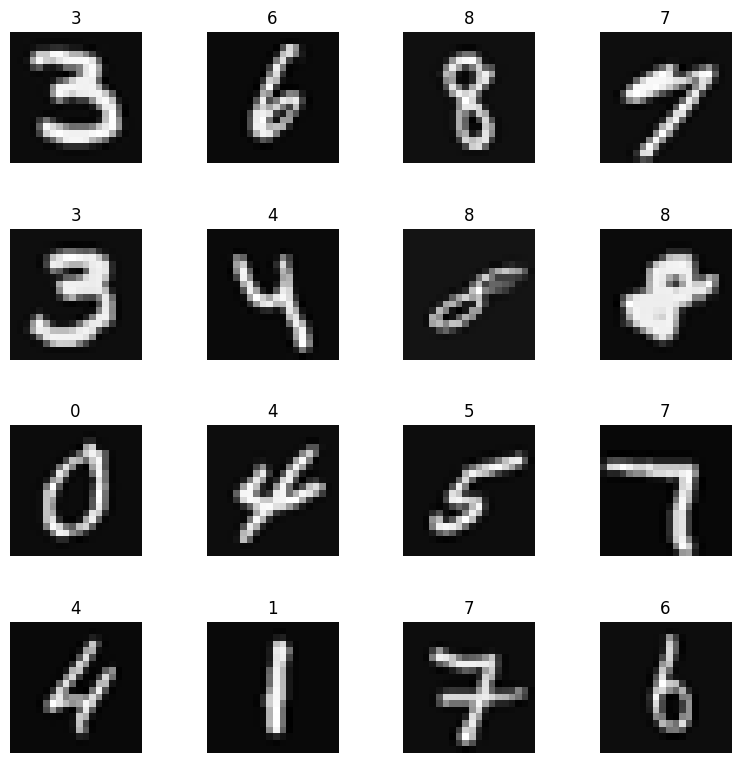

In [94]:
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.tight_layout(pad=1.0)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(int(y[random_index]))
    ax.set_axis_off()

plt.show()


Build the Neural Network

In [83]:
tf.random.set_seed(1000)
model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [84]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the Model and Fit

In [85]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
125/125 [==============================] - 1s 2ms/step - loss: 1.6192
Epoch 2/40
125/125 [==============================] - 0s 2ms/step - loss: 0.6531
Epoch 3/40
125/125 [==============================] - 0s 2ms/step - loss: 0.4376
Epoch 4/40
125/125 [==============================] - 0s 3ms/step - loss: 0.3539
Epoch 5/40
125/125 [==============================] - 0s 3ms/step - loss: 0.3098
Epoch 6/40
125/125 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 7/40
125/125 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 8/40
125/125 [==============================] - 0s 2ms/step - loss: 0.2363
Epoch 9/40
125/125 [==============================] - 0s 2ms/step - loss: 0.2221
Epoch 10/40
125/125 [==============================] - 0s 2ms/step - loss: 0.2108
Epoch 11/40
125/125 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 12/40
125/125 [==============================] - 0s 2ms/step - loss: 0.1856
Epoch 13/40
125/125 [====

Training Loss

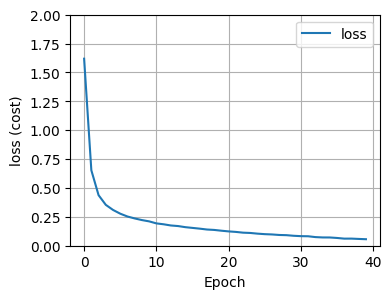

In [86]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

Example Prediction

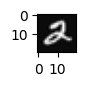

In [95]:
example_image = X[1000]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = example_image.reshape((20,20)).T
# Display the image
ax.imshow(X_reshaped, cmap='gray')
plt.show()

In [100]:
prediction = model.predict(example_image.reshape(1,400))
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

1/1 [==============================] - 0s 43ms/step
 predicting a Two. Probability vector: 
[[1.7530348e-05 3.1632194e-10 9.9769408e-01 5.1618874e-04 8.7187324e-10
  4.2282423e-05 9.4304946e-09 1.2578227e-05 1.6586105e-03 5.8832124e-05]]
Total of predictions: 1.000
np.argmax(prediction_p): 2


Model Training and Testing Accuracy

In [91]:
from sklearn.metrics import accuracy_score

# Assuming `model` is your trained model, `X_train` is your training data, and `y_train` is your true labels
predictions = model.predict(X_train)
yhat = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_train, yhat)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


predictions = model.predict(X_test)
yhat = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

125/125 [==============================] - 0s 3ms/step
Training Accuracy: 99.05%
32/32 [==============================] - 0s 2ms/step
Testing Accuracy: 90.80%
